In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import pandas.util.testing as tm


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [294]:
stud_math = pd.read_csv('//Volumes/Samsung_T5/Обучение/skillfactory/data/stud_math.csv')

Ниже представлен датасет с данными об учениках и результатами их экзаменов по математике.
Для построения модели, которая предсказывала бы результаты госэкзамена, проведем разведывательный анализ и определим, какие параметры влияют на результаты.

In [295]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [296]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит пропущенные данные почти во всех переменных
кроме school, sex, age. 
Посмотим, сколько всего пропущенных значений:

In [297]:
stud_math.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [298]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Переименую колонку studytime, granular

In [299]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

Заполню пропуски в номинативных переменных значением Unknown:

In [300]:
def fill_NaN(col):  
    if stud_math[col].dtypes == 'object':
        stud_math[col].fillna('Unknown', inplace=True)


  
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    fill_NaN(col)

In [301]:
stud_math.isna().sum()

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   3
Fedu                  24
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime            28
studytime              7
failures              22
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime_granular     7
higher                 0
internet               0
romantic               0
famrel                27
freetime              11
goout                  8
health                15
absences              12
score                  6
dtype: int64

#### Функция get_hist()  выводит гистограмму и основную информацию для переменных

In [240]:
def get_hist(column):
    print(column.upper())
    num = len(stud_math[column].value_counts())
    plt.hist(stud_math[column],num)
    plt.xlabel(column)
    plt.ylabel('Количество встречаемости значения')
    plt.show()
    print("пустых значений: " + str(stud_math[column].isna().sum()))
    display(stud_math[column].value_counts(dropna=False, normalize=True))
    display(stud_math[column].describe())



#for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
#       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
#       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
#       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
#       'freetime', 'goout', 'health', 'absences', 'score']:
#    print()
#    try: get_hist(col)
#    except:
#        print( col )


Далее буду смотреть переменные по одной




## score — баллы по госэкзамену по математике

SCORE


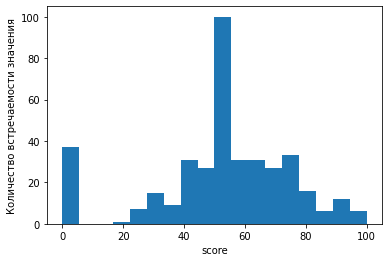

пустых значений: 6


50.0     0.136709
55.0     0.116456
0.0      0.093671
75.0     0.083544
65.0     0.078481
40.0     0.078481
60.0     0.078481
45.0     0.068354
70.0     0.068354
80.0     0.040506
30.0     0.037975
90.0     0.030380
35.0     0.022785
25.0     0.017722
NaN      0.015190
85.0     0.015190
95.0     0.012658
100.0    0.002532
20.0     0.002532
Name: score, dtype: float64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [303]:
get_hist('score')

Переменная числовая.
Имела бы нормальное распределение, если бы не большое значение нулевых результатов на экзамене.
Максимальный балл на экзамене - 100
Средний - 52

Поскольку score - это наша целевая переменная, удаляю строки с пропусками:

In [305]:
stud_math = stud_math.dropna(subset=['score'])

Является ли выбросом результат 0? 
Полагаю, что это не выброс, скорее всего усть ученики, которые сдавали совсем незаполненный тест и получили 0 баллов

## school - аббревиатура школы, в которой учится ученик

SCHOOL


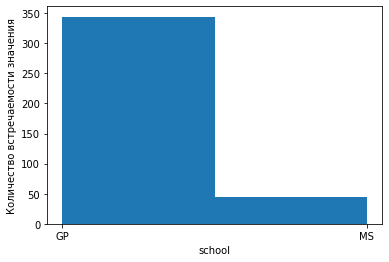

пустых значений: 0


GP    0.884319
MS    0.115681
Name: school, dtype: float64

count     389
unique      2
top        GP
freq      344
Name: school, dtype: object

In [307]:
get_hist('school')

Номинативная переменная, которая не имеет пустых значений. 
Большинство учеников обучаются в школе GP и значительно меньшее количество детей учится в GP.

In [217]:
#stud_math = pd.get_dummies(stud_math, columns=['school'])

## SEX - пол ученика ('F' - женский, 'M' - мужской)

SEX


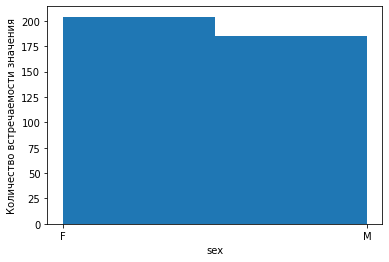

пустых значений: 0


F    0.524422
M    0.475578
Name: sex, dtype: float64

count     389
unique      2
top         F
freq      204
Name: sex, dtype: object

In [308]:
get_hist('sex')

Номинативная переменная с равномерным распределением, которая не имеет пустых значений. Распределение учеников по полам примерно напополам, с небольшим перевесом девочек.

## age — возраст ученика (от 15 до 22)

AGE


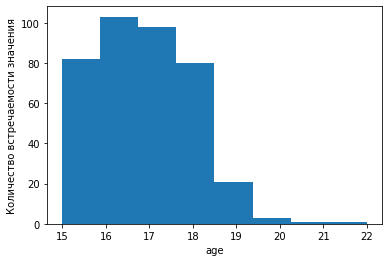

пустых значений: 0


16    0.264781
17    0.251928
15    0.210797
18    0.205656
19    0.053985
20    0.007712
22    0.002571
21    0.002571
Name: age, dtype: float64

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [309]:
get_hist('age')

Числовая переменная, которая не имеет пустых значений.
Ассимитричное нормальное(??) распределение с максимальным значением 16 лет

## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

MEDU


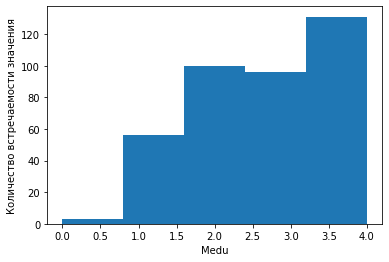

пустых значений: 3


4.0    0.336761
2.0    0.257069
3.0    0.246787
1.0    0.143959
0.0    0.007712
NaN    0.007712
Name: Medu, dtype: float64

count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [310]:
get_hist('Medu')

Числовая переменная, которая имеет всего три пустых значения. Я заполню пустые поля значением, которое встречается чаще всего

In [68]:
stud_math['Medu'].fillna(stud_math['Medu'].median(), inplace=True)

Тренд на увеличение, то есть чем лучше образование матери, тем выше результат ученика.

## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

FEDU


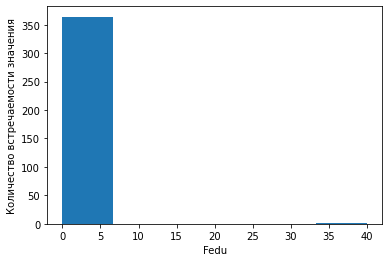

пустых значений: 24


2.0     0.269923
3.0     0.241645
4.0     0.226221
1.0     0.192802
NaN     0.061697
0.0     0.005141
40.0    0.002571
Name: Fedu, dtype: float64

count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [311]:
get_hist('Fedu')

На гистограмме замтно присутствие выброса (это строки со значениями выше 4), посмотрим их:

In [312]:
stud_math[stud_math.Fedu > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,Unknown,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [313]:
# заполню выброс самым частым значением
stud_math['Fedu'].loc[11] = 2.0

Fedu - числовая переменная, которая имеет 24 пустых значения. 
Буду считать, что внутри одной семьи люди имеют похожее образование, и в строках с пустыми значениями образование отца установлю таким же как и образование матери:

In [314]:
stud_math['Fedu'].fillna(stud_math['Medu'], inplace=True)

## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)


MJOB


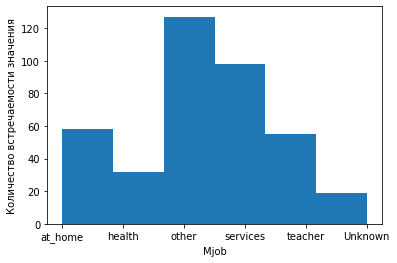

пустых значений: 0


other       0.326478
services    0.251928
at_home     0.149100
teacher     0.141388
health      0.082262
Unknown     0.048843
Name: Mjob, dtype: float64

count       389
unique        6
top       other
freq        127
Name: Mjob, dtype: object

In [315]:
get_hist('Mjob')

Номинативная переменная.
Столбцы other и Unknown объединю и оставлю только other

In [317]:
def get_reason(row):
    if row['Mjob']  == "Unknown":
        return "other"
    return row['Mjob']
    
stud_math['Mjob'] = stud_math.apply(get_reason, axis=1)

## Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

FJOB


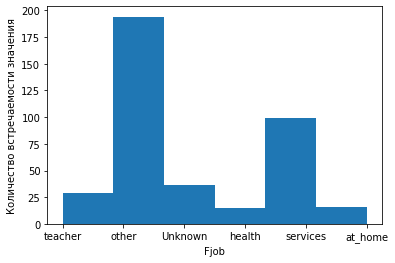

пустых значений: 0


other       0.498715
services    0.254499
Unknown     0.092545
teacher     0.074550
at_home     0.041131
health      0.038560
Name: Fjob, dtype: float64

count       389
unique        6
top       other
freq        194
Name: Fjob, dtype: object

In [318]:
get_hist('Fjob')

Номинативная переменная.
Столбцы other и Unknown объединю и оставлю только other

In [319]:
def get_reason(row):
    if row['Fjob']  == "Unknown":
        return "other"
    return row['Fjob']
    
stud_math['Fjob'] = stud_math.apply(get_reason, axis=1)

## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

REASON


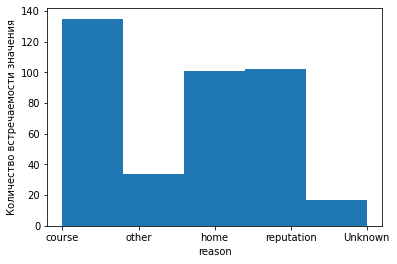

пустых значений: 0


course        0.347044
reputation    0.262211
home          0.259640
other         0.087404
Unknown       0.043702
Name: reason, dtype: float64

count        389
unique         5
top       course
freq         135
Name: reason, dtype: object

In [320]:
get_hist('reason')

Номинативная переменная. Большинство детей выбирают школу, 
отталкиваясь от образовательной программы и репутации школы. 
Столбцы other и Unknown объединю и оставлю только other

In [323]:
def get_reason(row):
    if row['reason']  == "Unknown":
        return "other"
    return row['reason']
    
stud_math['reason'] = stud_math.apply(get_reason, axis=1)

## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

GUARDIAN


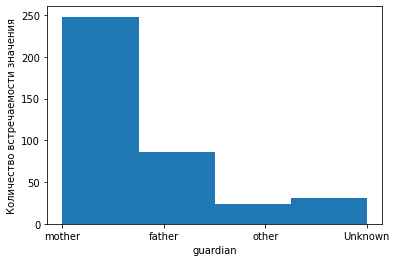

пустых значений: 0


mother     0.637532
father     0.221080
Unknown    0.079692
other      0.061697
Name: guardian, dtype: float64

count        389
unique         4
top       mother
freq         248
Name: guardian, dtype: object

In [324]:
get_hist('guardian')

Номинативная переменная.

Столбцы other и Unknown объединю и оставлю только other

In [325]:
def get_reason(row):
    if row['guardian']  == "Unknown":
        return "other"
    return row['guardian']
    
stud_math['guardian'] = stud_math.apply(get_reason, axis=1)


## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

FAMSIZE


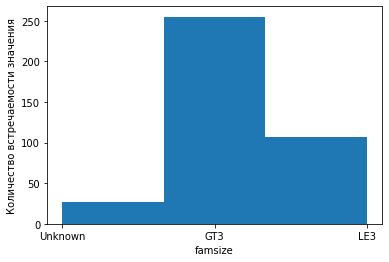

пустых значений: 0


GT3        0.655527
LE3        0.275064
Unknown    0.069409
Name: famsize, dtype: float64

count     389
unique      3
top       GT3
freq      255
Name: famsize, dtype: object

In [326]:
get_hist('famsize')

Номинативная переменная.
Большинство семей включают более трех детей.

## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

PSTATUS


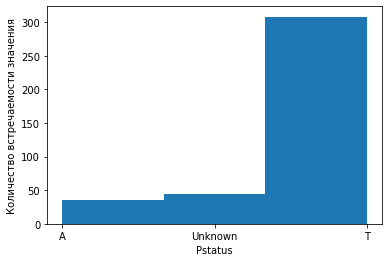

пустых значений: 0


T          0.791774
Unknown    0.115681
A          0.092545
Name: Pstatus, dtype: float64

count     389
unique      3
top         T
freq      308
Name: Pstatus, dtype: object

In [327]:
get_hist('Pstatus')

Номинативная переменная.
Большинство родителей живут совместно.

## traveltime — время в пути до школы

TRAVELTIME


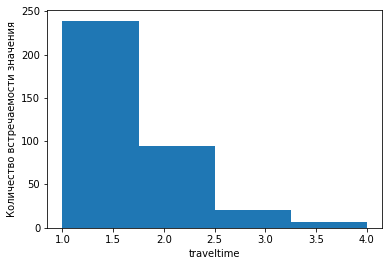

пустых значений: 28


1.0    0.614396
2.0    0.241645
NaN    0.071979
3.0    0.053985
4.0    0.017995
Name: traveltime, dtype: float64

count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [330]:
get_hist('traveltime')

Числова переменная, которая имеет 28 пустых значений. Заполню пустые значения значением, встречающимся максимально часто:

In [332]:
stud_math['traveltime'].fillna(stud_math['traveltime'].median(), inplace=True)

## studytime — время на учёбу помимо школы в неделю

STUDYTIME


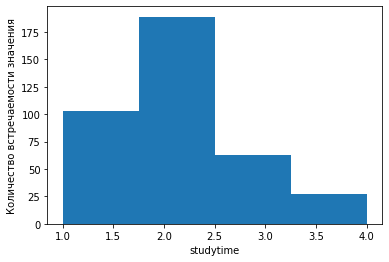

пустых значений: 7


2.0    0.485861
1.0    0.264781
3.0    0.161954
4.0    0.069409
NaN    0.017995
Name: studytime, dtype: float64

count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [333]:
get_hist('studytime')

Числовая перменная. Есть пропущенные данные.

In [335]:
stud_math[stud_math['studytime'].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,NaN,0.0,yes,Unknown,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,Unknown,2.0,2.0,at_home,other,other,mother,1.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,Unknown,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,Unknown,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,Unknown,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,Unknown,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,Unknown,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,Unknown,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


In [337]:
#stud_math['studytime'].fillna(stud_math['studytime'].median(), inplace=True)

Если ребенок посещает платные занятия по математике (paid), то проставлю значение 3, если не посещает - проставлю 2 (мода):

In [338]:
def get_studytime(row):
    #pd.isnull(row['studytime'])
    #pd.isna(row['studytime'])
    if (pd.isnull(row['studytime'])) and (row['paid'] == 'yes'):
        return 3
    elif (pd.isnull(row['studytime'])) and (row['paid'] != 'yes'):
        return 2
    else: row['studytime']

    
stud_math['studytime'] = stud_math.apply(get_studytime, axis=1)

In [339]:
#stud_math.iloc[91]

In [340]:
#stud_math[stud_math['studytime'] == 4]['score'].mean()

## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

FAILURES


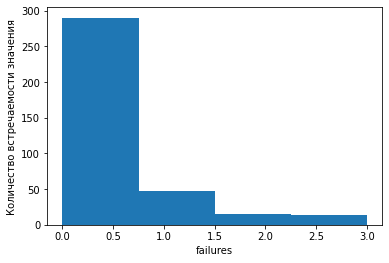

пустых значений: 22


0.0    0.745501
1.0    0.123393
NaN    0.056555
2.0    0.038560
3.0    0.035990
Name: failures, dtype: float64

count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [390]:
get_hist('failures')

In [ ]:
Очень очень странная номинативная переменная, которая не понятно, что означает.
Имеет 22 пропуска. Заполняю пропуски медианой:

In [209]:
stud_math['failures'].fillna(stud_math['failures'].median(), inplace=True)

Студенты с максимальным значением неудач действительно именю очень низкий результат на экзамене:

In [343]:
stud_math[stud_math['failures'] == 3]['score'].mean()

29.642857142857142

## schoolsup — дополнительная образовательная поддержка 

SCHOOLSUP


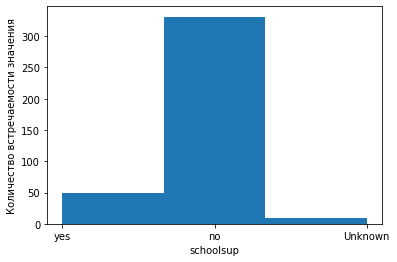

пустых значений: 0


no         0.850900
yes        0.125964
Unknown    0.023136
Name: schoolsup, dtype: float64

count     389
unique      3
top        no
freq      331
Name: schoolsup, dtype: object

In [344]:
get_hist('schoolsup')

Номинативная переменная, 2% значений не были заполнены (Unknown). Большинство детей не получили поддержку от школы. 

In [345]:
#stud_math[stud_math['schoolsup'] == "Unknown"]

## famsup — семейная образовательная поддержка

FAMSUP


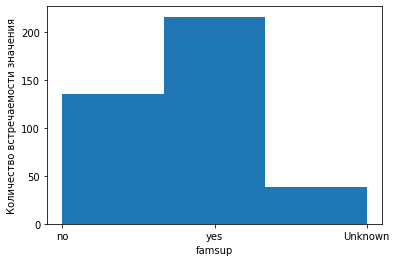

пустых значений: 0


yes        0.555270
no         0.347044
Unknown    0.097686
Name: famsup, dtype: float64

count     389
unique      3
top       yes
freq      216
Name: famsup, dtype: object

In [346]:
get_hist('famsup')

Номинативная переменная. Довольно большой процент неизвестных данных (Unknown). 
Более половины детей получили поддержку от семьи. 

## paid — дополнительные платные занятия по математике  (yes или no)

PAID


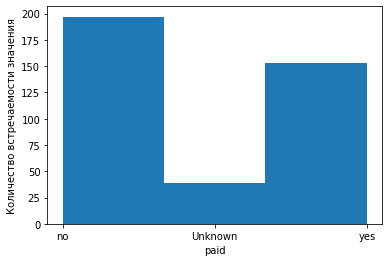

пустых значений: 0


no         0.506427
yes        0.393316
Unknown    0.100257
Name: paid, dtype: float64

count     389
unique      3
top        no
freq      197
Name: paid, dtype: object

In [347]:
get_hist('paid')

Номинативная переменная. Довольно большой процент неизвестных данных (Unknown).
Около 40% детей посещают дополнительные занятия.

## activities — дополнительные внеучебные занятия

ACTIVITIES


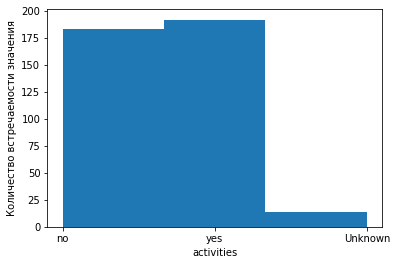

пустых значений: 0


yes        0.493573
no         0.470437
Unknown    0.035990
Name: activities, dtype: float64

count     389
unique      3
top       yes
freq      192
Name: activities, dtype: object

In [348]:
get_hist('activities')

Номинативная переменная с равномерным распределением. Маленький процент неизвестных данных (Unknown).
Примерно половина детей посещает курсы не связанные с обучением (возможно какой-то спорт)

## nursery — посещал детский сад

NURSERY


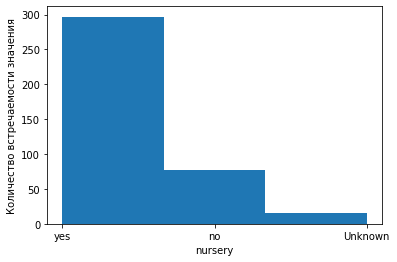

пустых значений: 0


yes        0.763496
no         0.197943
Unknown    0.038560
Name: nursery, dtype: float64

count     389
unique      3
top       yes
freq      297
Name: nursery, dtype: object

In [349]:
get_hist('nursery')

Номинативная переменная. Абсолютное большинство учеников посещали детский сад. Маленький процент неизвестных данных (Unknown)

In [120]:
#stud_math[stud_math['nursery'] == 'no']

## higher — хочет получить высшее образование

HIGHER


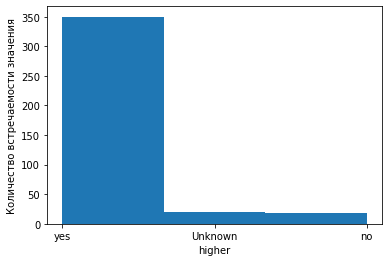

пустых значений: 0


yes        0.899743
Unknown    0.051414
no         0.048843
Name: higher, dtype: float64

count     389
unique      3
top       yes
freq      350
Name: higher, dtype: object

In [350]:
get_hist('higher')

Номинативная переменная. 
Абсолютное большинство детей хотят иметь высшее образование. 
Маленький процент неизвестных данных (Unknown)

Хочу также отметить, что та небольшая группа детей, которая не хочет получить ВО, 
имеет в среднем довольно низкий результат на экзамене:

In [352]:
stud_math[stud_math['higher'] == 'no']['score'].mean()

33.68421052631579

## internet — наличие интернета дома

INTERNET


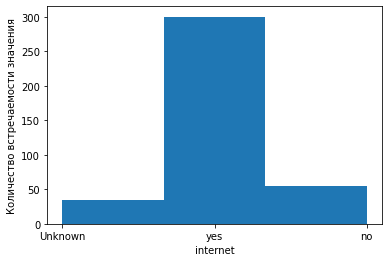

пустых значений: 0


yes        0.771208
no         0.141388
Unknown    0.087404
Name: internet, dtype: float64

count     389
unique      3
top       yes
freq      300
Name: internet, dtype: object

In [353]:
get_hist('internet')

Номинативная переменная. 
Большинство детей имеют дома интернет. 

## romantic — в романтических отношениях

ROMANTIC


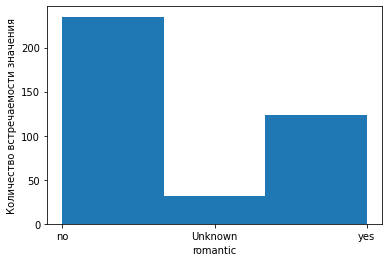

пустых значений: 0


no         0.604113
yes        0.316195
Unknown    0.079692
Name: romantic, dtype: float64

count     389
unique      3
top        no
freq      235
Name: romantic, dtype: object

In [354]:
get_hist('romantic')

Номинативная переменная. Более половины детей не состоят в романтических отношениях. 
Забавно также, что средний балл у них при этом выше)

In [356]:
stud_math[stud_math['romantic'] == 'no']['score'].mean()

54.57446808510638

## famrel — семейные отношения  (от 1 - очень плохо до 5 - очень хорошо)

FAMREL


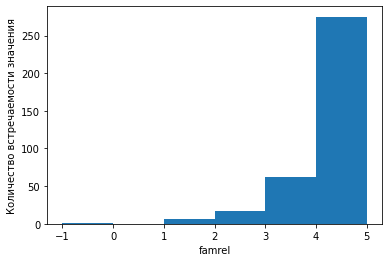

пустых значений: 27


 4.0    0.457584
 5.0    0.249357
 3.0    0.159383
 NaN    0.069409
 2.0    0.043702
 1.0    0.017995
-1.0    0.002571
Name: famrel, dtype: float64

count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [357]:
get_hist('famrel')

Буду считать эту переменную количественной, с трендом на провышение (большинство детей оценили остановку в семье как хорошую).
Присутствуют выбросы:

In [358]:
stud_math[stud_math['famrel']<1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,Unknown,2.0,2.0,services,services,home,mother,1.0,None,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [360]:
# заполню выброс самым частым значением
stud_math['famrel'].loc[25] = 4.0

## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

FREETIME


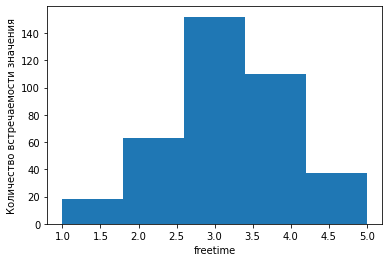

пустых значений: 9


3.0    0.390746
4.0    0.282776
2.0    0.161954
5.0    0.095116
1.0    0.046272
NaN    0.023136
Name: freetime, dtype: float64

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [362]:
get_hist('freetime')

Количественная переменная с нормальным распределением.
Пустые значения заполню медианой:

In [391]:
stud_math['failures'].mean()

0.32697547683923706

In [364]:
stud_math['freetime'].fillna(stud_math['freetime'].median(), inplace=True)

## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

GOOUT


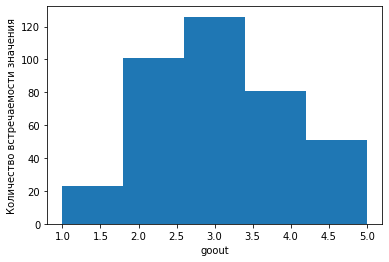

пустых значений: 7


3.0    0.323907
2.0    0.259640
4.0    0.208226
5.0    0.131105
1.0    0.059126
NaN    0.017995
Name: goout, dtype: float64

count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [365]:
get_hist('goout')

Количественная переменная с нормальным распределением.
Пустые значения заполню медианой:

In [366]:
stud_math['goout'].fillna(stud_math['goout'].median(), inplace=True)

Полагаю, что эта переменная будет коррелировать с freetime.

## health — текущее состояние здоровья  (от 1 - очень плохо до 5 - очень хорошо)

HEALTH


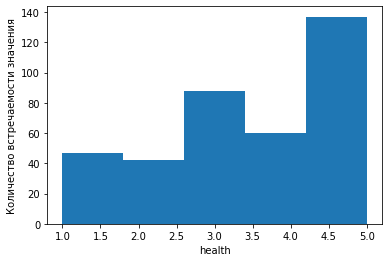

пустых значений: 15


5.0    0.352185
3.0    0.226221
4.0    0.154242
1.0    0.120823
2.0    0.107969
NaN    0.038560
Name: health, dtype: float64

count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [367]:
get_hist('health')

Количественная переменная с трендом на увеличение.
Треть детей оценивает свое здровье на 5.
Около 20 % детей считают свое здоровье неудовлетворительным.
Пустые значения заполню медианой:

In [368]:
stud_math['health'].fillna(stud_math['health'].median(), inplace=True)

Интересным считаю тот факт, что дети со здоровьем на 1 имеют средний рейтинг выше среднего:

In [369]:
stud_math[stud_math['health'] == 1]['score'].mean()

59.361702127659576

## absences — количество пропущенных занятий

ABSENCES


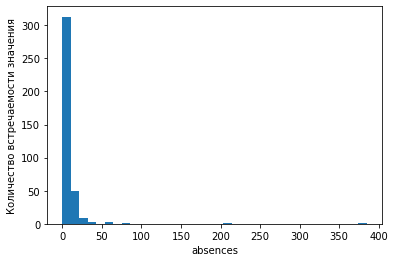

пустых значений: 11


0.0      0.282776
2.0      0.154242
4.0      0.133676
6.0      0.077121
8.0      0.051414
10.0     0.043702
12.0     0.030848
14.0     0.030848
NaN      0.028278
16.0     0.017995
3.0      0.017995
7.0      0.015424
5.0      0.012853
18.0     0.012853
20.0     0.010283
1.0      0.007712
22.0     0.007712
9.0      0.007712
13.0     0.005141
15.0     0.005141
11.0     0.005141
25.0     0.002571
54.0     0.002571
385.0    0.002571
26.0     0.002571
56.0     0.002571
24.0     0.002571
212.0    0.002571
21.0     0.002571
75.0     0.002571
30.0     0.002571
19.0     0.002571
38.0     0.002571
40.0     0.002571
23.0     0.002571
17.0     0.002571
28.0     0.002571
Name: absences, dtype: float64

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [370]:
get_hist('absences')

Количественная переменная с трендом на уменьшение.
Основная масса детей пргуляла не более 20 занятий.
В среднем это 7 занятий.

In [371]:
stud_math[stud_math['absences'] > 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,None,1.0,no,Unknown,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,None,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,None,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,Unknown,3.0,3.0,other,other,reputation,mother,1.0,None,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,Unknown,4.0,4.0,services,teacher,home,mother,2.0,None,1.0,no,yes,no,no,yes,-3.0,yes,Unknown,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,None,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,other,reputation,mother,1.0,None,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,None,0.0,yes,Unknown,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,Unknown,4.0,3.0,other,other,home,father,1.0,None,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,None,0.0,no,Unknown,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


Может быть здоровье влияет на прогулы?

In [372]:
stud_math[stud_math['health'] < 3]['absences'].mean()

6.186046511627907

не похоже на первый взгляд

Является ли пропуск 385 занятий выбросом?

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


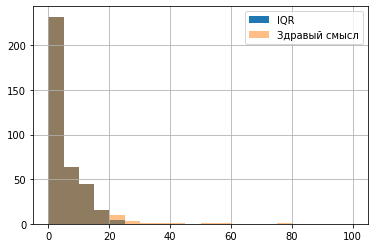

In [373]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 , perc75 + 1.5*IQR)].hist(bins = 20
                                                                                              , range = (0, 100), 
                                                                                             label = 'IQR')
stud_math.absences.loc[stud_math.absences <= 100].hist(alpha = 0.5, bins = 20, range = (0, 100),
                                                        label = 'Здравый смысл')
plt.legend();

Значения более 60 буду считать выбросами.

In [375]:
stud_math[stud_math['absences'] > 60]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,None,0.0,yes,Unknown,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,None,0.0,no,Unknown,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,other,1.0,None,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [393]:
#таких значений всего три таких, заменю на медиану
stud_math['absences'].loc[222] = stud_math['absences'].median()
stud_math['absences'].loc[390] = stud_math['absences'].median()
stud_math['absences'].loc[276] = stud_math['absences'].median()

In [210]:
#stud_math['absences'].loc[276] 

In [378]:
#пустые значения также заменю на медиану
stud_math['absences'].fillna(stud_math['health'].median(), inplace=True)

In [214]:
#get_hist('absences')

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

ADDRESS


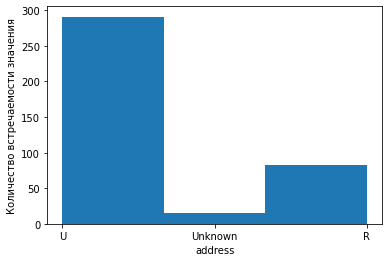

пустых значений: 0


U          0.748072
R          0.213368
Unknown    0.038560
Name: address, dtype: float64

count     389
unique      3
top         U
freq      291
Name: address, dtype: object

In [379]:
get_hist('address')

Номинативная переменная. Ребята в основном городские.

## Корреляционный анализ

Построю тепловую матрицу для числовых переменных:

In [380]:
dd = stud_math[['age', 'traveltime','studytime','studytime_granular', 'failures', 'famrel','freetime', 'goout', 'health', 'absences', 'score']]

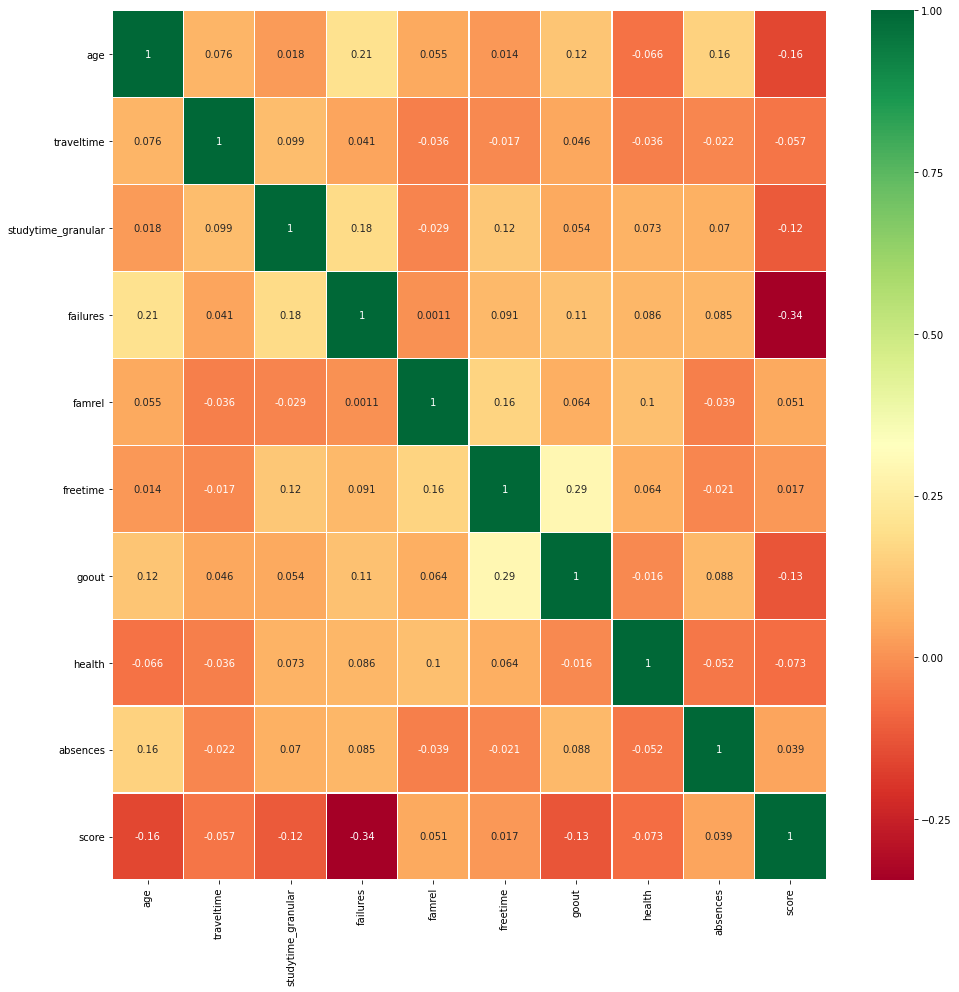

In [381]:
sns.heatmap(dd.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(16,16)
plt.show()

Переменные studytime и studytime_granular сильно скоррелированы, поэтому убираем одну из них и оставим только 
studytime.

In [382]:
stud_math = stud_math.drop(['studytime_granular'], axis=1)

Имеется слабая корреляция между признаками freetime и goout, failures и age

C признаком score сильнее всего скоррелированы failures, ages и goout.
Большое количество неудач (failures) негативно влияют на оценку.
Ученики более старшего возраста получают более низкие (видимо это отстающие ученики, которые переводились на нурс младше). И время проведенное с друзьями также отрицательно сказывается на результатах учебы.


Оставляю эти три признака: failures, ages,goout

## Анализ номинативных переменных

В нашей выборке присутствует много номинативных переменных.
Построю для них графики бокс-плот

In [383]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud_math ,ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

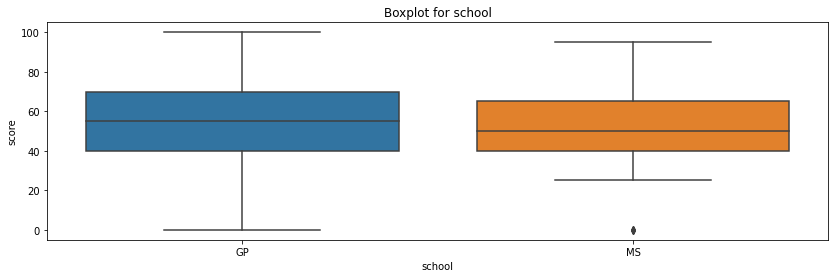

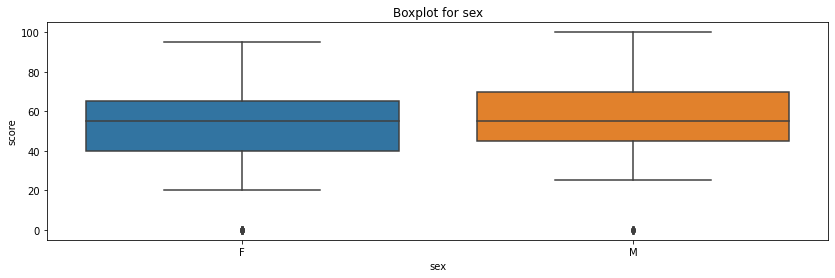

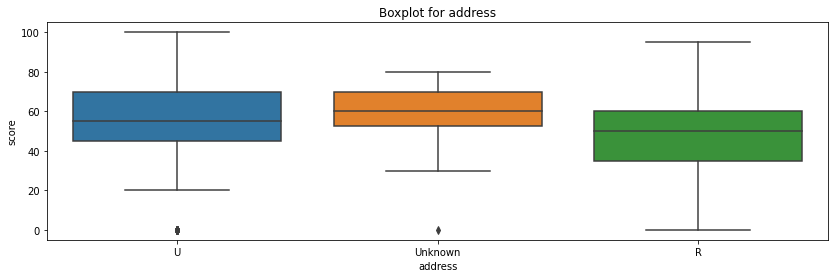

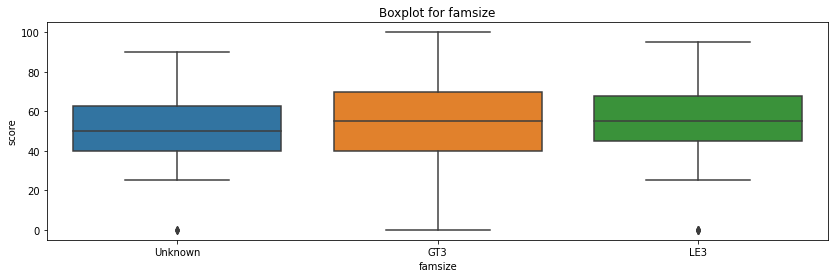

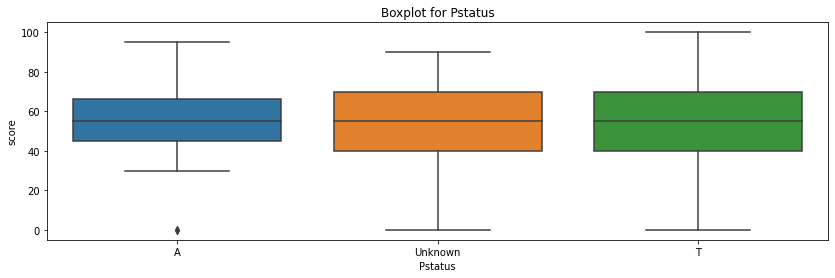

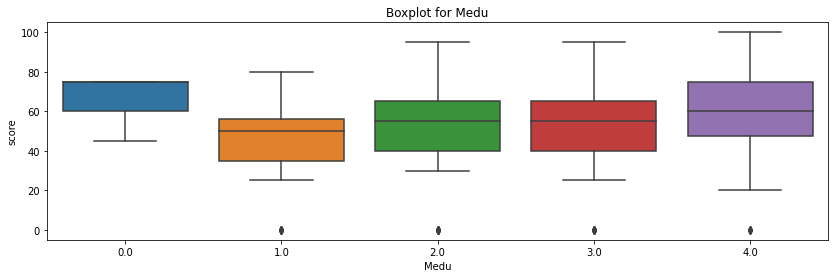

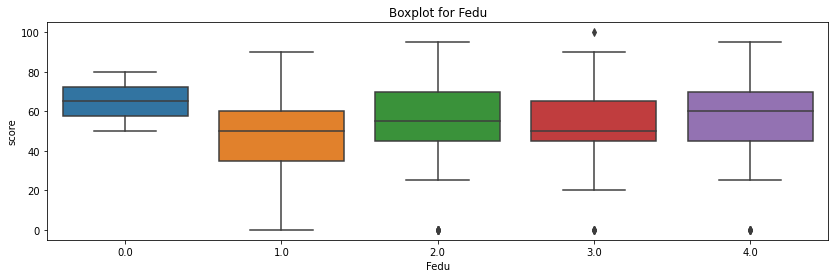

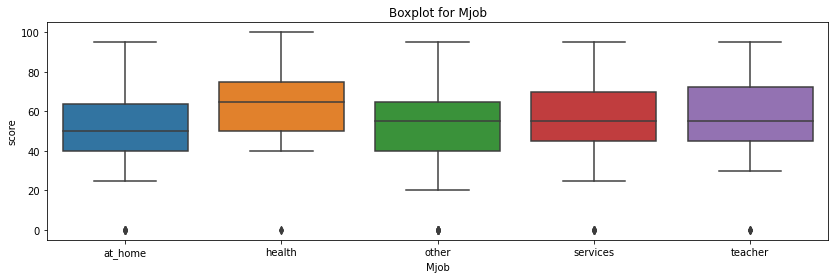

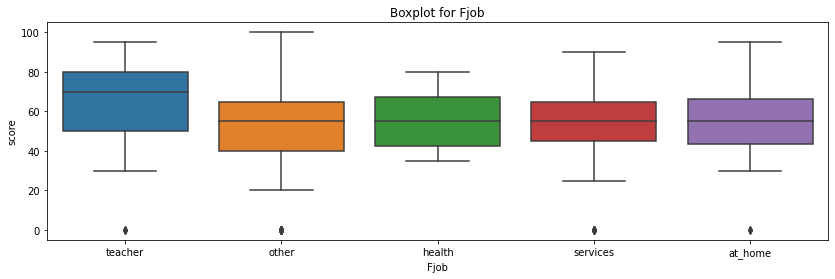

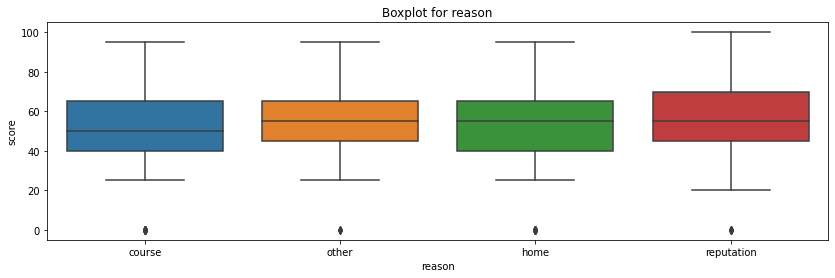

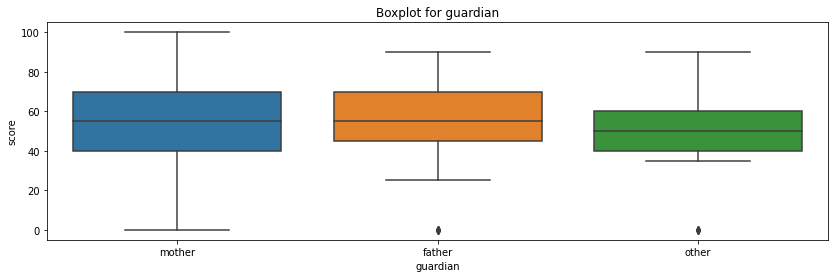

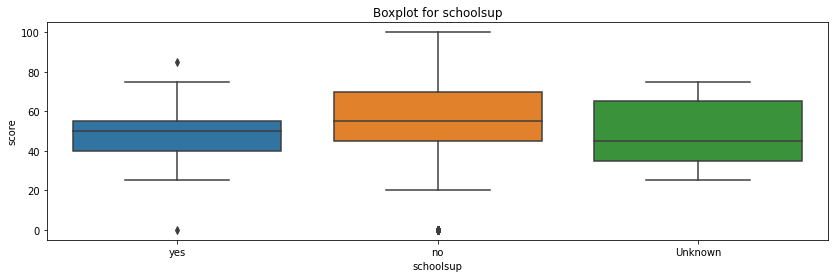

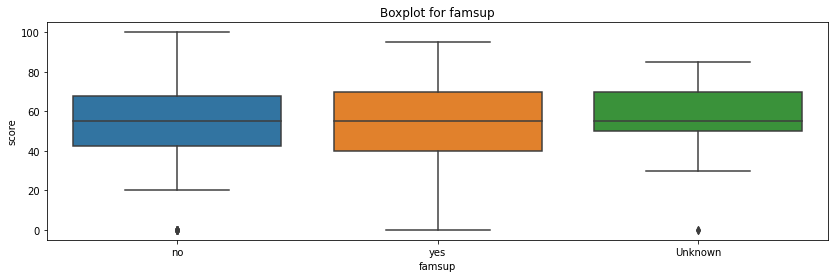

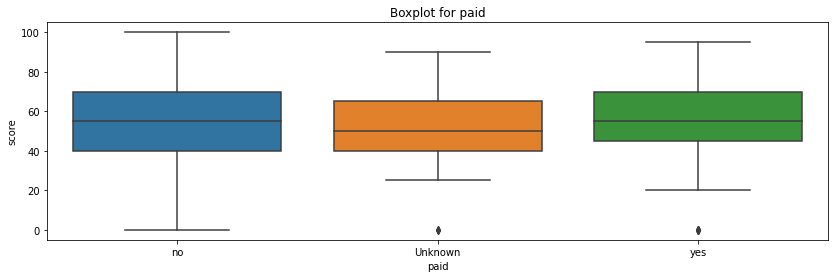

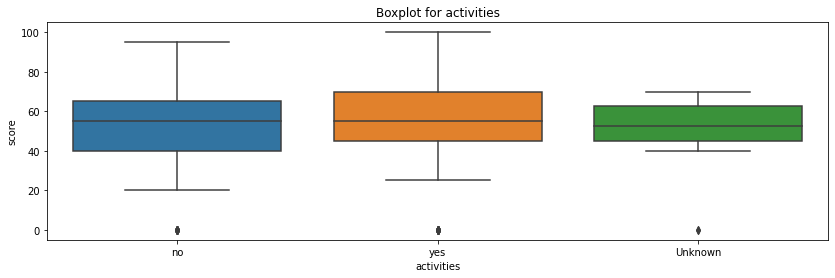

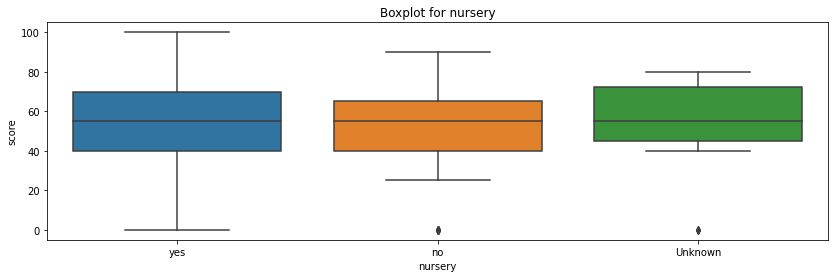

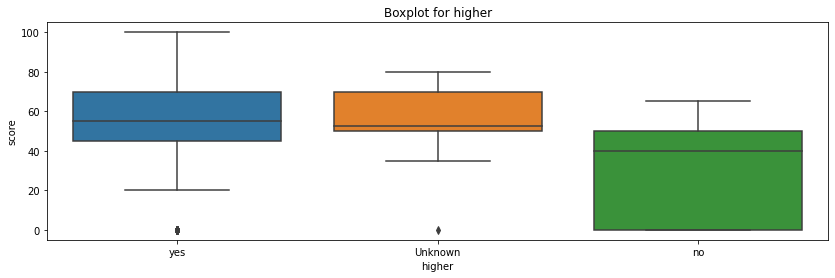

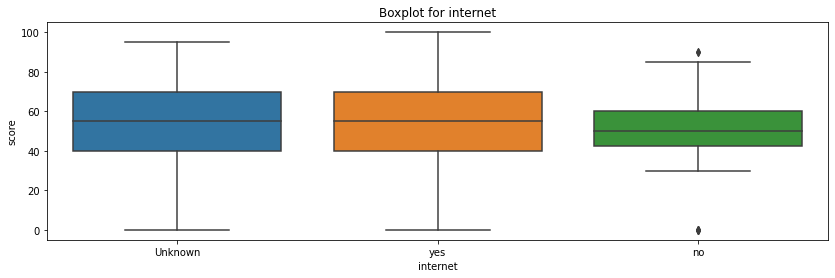

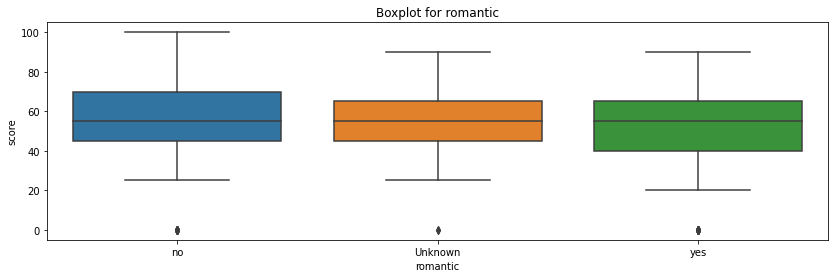

In [384]:
for col in ['school', 'sex',  'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic']:
    get_boxplot(col)

Оценка графиков:

* школа GP незначительно лучше школы MS, размер семьи, а также развод родителей, опекун, школа, пол, внеучебные занятия, детский сад, регион проживания, наличие интернета  практически не влияют на результат экзамена;
* образование родителей, а также их специальность значительно влияют на результат учеников;
* поддержка школы имеет слабую связь с результатами, тогда как поддержка семьи не играет роли;
* странно, но дополнительные занятия по математике имеют очень незначительное влияние на результат;     
* желание ученика получить высшее образование тесно связано с результатом экзамена;
* романтические отношения имеют влияние на результат.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [386]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [387]:
for col in ['school', 'sex',  'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются параметры: Medu, Fedu, Mjob, higher, romantic.
Оставим эти переменные в датасете для дальнейшего построения модели. 
Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 
Medu, Fedu, Mjob, higher, romantic, failures, ages, goout.

## Выводы

* В данных присутствует небольшое количество нулевых значений, все переменные имеют высокий процент заполненных значений.
* Найдены незначительные выбросы в трех столбцах (Fedu, famrel, absence), что позволяет сделать вывод о том, что данные достаточно чистые.
* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, Fedu, Mjob, higher, romantic, failures, ages,goout.